# Setup and simulate Schizophrenia network

In [3]:
from snudda import Snudda

network_path = "network/d2oe-0"

snd_wt = Snudda(network_path=network_path)
snd_wt.init_config(network_size=100, 
                   snudda_data="../../../../bgmod/models/optim/schizophrenic/BGDATA/WT",
                   honor_stay_inside=False,
                   overwrite=True, random_seed=1234)

Legacy config creation.
Creating config file
Network path: network/d2oe-0
Adding Striatum with 100 neurons (stay_inside=False)
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/chin
Adding neurons: LTS from dir /home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/lts
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Adding GPe with 0 neurons
Adding GPi with 0 neurons
Adding SNr with 0 neurons
Adding STN with 0 neurons
Adding Cortex w

In [4]:
snd_wt.create_network()

Placing neurons
Network path: network/d2oe-0
Reading SNUDDA_DATA=/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT from network/d2oe-0/network-config.json
No n_putative_points and putative_density, setting n_putative_points = 780
(this must be larger than the number of neurons you want to place)
Generating 780 points for network/d2oe-0/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Filtering, keeping inside points: 129 / 300
neuron_name = 'FS_0', num = 0, neuron_path = '/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20210210'
neuron_name = 'FS_1', num = 0, neuron_path = '/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/fs/str-fs-e161024_FS16-mDR-rat-Mar-13-08-1-536-R-v20210210'
neuron_name = 'FS_2', num = 0, neuron_path = '/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT/neurons/striatum/fs/str-fs-e161205_FS1-mBE104E-v20210209'
neuron_name = 'FS_3', num = 1, neuron_

AttributeError: 'tuple' object has no attribute 'tb_frame'

In [3]:
from snudda.analyse import SnuddaAnalyseStriatum   
nas = SnuddaAnalyseStriatum(network_path, volume_type="cube")


Loading network/d2oe-0/network-synapses.hdf5
Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Creating figures directory network/d2oe-0/figures
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.0007832770006643841 seconds
Created connection matrix 0.006037343000571127 seconds
Created gap junction connection matrix 6.583200047316495e-05 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 5843, at 0
Created distance histogram (optimised) in 0.005171401000552578 seconds
Saving cache to network/d2oe-0/network-synapses.hdf5-cache


Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2304.]
P(d<5e-05) = 0.07248322147651007
P(d<0.0001) = 0.05535390199637023


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1439: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


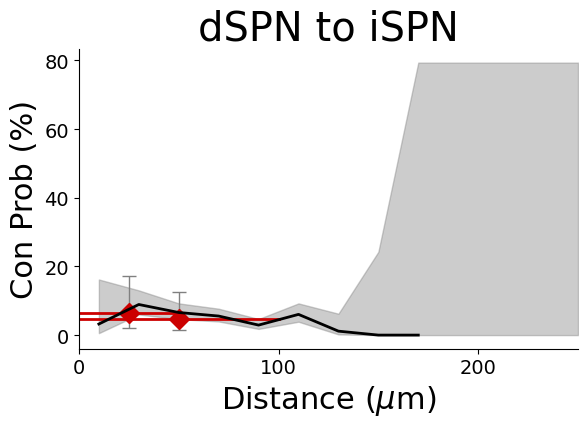

Wrote network/d2oe-0/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2256.]
P(d<5e-05) = 0.2030812324929972
P(d<0.0001) = 0.18117977528089887


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1439: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


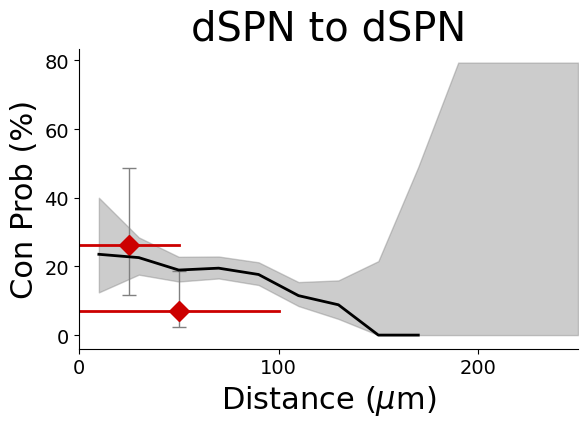

Wrote network/d2oe-0/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2304.]
P(d<5e-05) = 0.23221476510067113
P(d<0.0001) = 0.19827586206896552


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1439: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


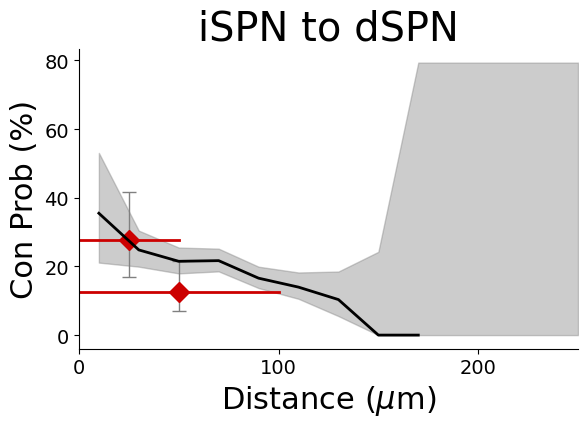

Wrote network/d2oe-0/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-3D-dist.png
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2256.]
P(d<5e-05) = 0.3740053050397878
P(d<0.0001) = 0.29981634527089074


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1439: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


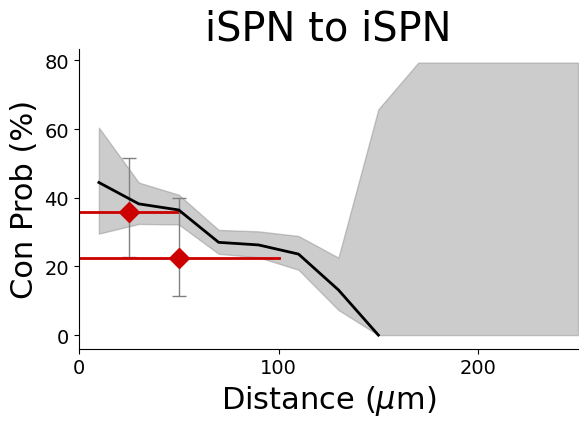

Wrote network/d2oe-0/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png


({5e-05: 0.3740053050397878, 0.0001: 0.29981634527089074},
 'network/d2oe-0/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-3D-dist.png')

In [5]:
dist3D = True

nas.plot_connection_probability("dSPN", "iSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[3 / 47.0, 3 / 66.0],
                                exp_data_detailed=[(3, 47), (3, 66)])
nas.plot_connection_probability("dSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[5 / 19.0, 3 / 43.0],
                                exp_data_detailed=[(5, 19), (3, 43)])
nas.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)])
nas.plot_connection_probability("iSPN", "iSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[14 / 39.0, 7 / 31.0],
                                exp_data_detailed=[(14, 39), (7, 31)])

In [9]:
snd_wt.setup_input(input_config="input.json")

Setting up inputs, assuming input.json exists
Reading SNUDDA_DATA=/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT from network/d2oe-0/network-config.json
Missing input config file: network/d2oe-0/input.json


In [ ]:
snd_wt.simulate(time=1.0)

MPI Rank: 0, Size: 1
Using input file None
Reading SNUDDA_DATA=/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT from network/d2oe-0/network-config.json
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
Reading SNUDDA_DATA=/home/hjorth/HBP/bgmod/models/optim/schizophrenic/BGDATA/WT from network/d2oe-0/network-config.json
MPI Rank: 0, Size: 1 -- NEURON: This is node 0 out of 1
0 : Memory status: 73% free
Empty mod_file field for ChIN -> dSPN synapses. This channel is IGNORED.
Empty mod_file field for ChIN -> iSPN synapses. This channel is IGNORED.
0 : Memory status: 72% free
Added 0.0 gap junctions to simulation (0 total)
Added 5843 synapses to simulation (5843 total)
0 : Memory status: 72% free
No input file given, not adding external input!
0 : Memory status: 72% free
0 : Memory status: 72% free
Running simulation f

In [5]:
import os
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadSimulation

sl = SnuddaLoad(network_path)

sim_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")

sls = SnuddaLoadSimulation(network_simulation_output_file=sim_file)

ValueError: Network path network/d2oe-0 specified, but no file network/d2oe-0/network-synapses.hdf5

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file, network_file=network_file)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(0,0.5),fig_size=(10,4))